In [1]:
from spec_extract import *
from astropy.table import Table
import pandas as pd
from glob import glob
from spec_tools import Source_present
from grizli import multifit
import matplotlib.pyplot as plt
import seaborn as sea
from astropy.io import fits

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

if hpath == '/Users/Vince.ec/':
    dpath = '/Volumes/Vince_research/Data/' 
    
else:
    dpath = hpath + 'Data/' 


In [2]:
gsd_cat = pd.read_pickle('../dataframes/GS_snr.pkl')
gnd_cat = pd.read_pickle('../dataframes/GN_snr.pkl')

In [3]:
# gsd_fields = ['ERSPRIME', 'GS1', 'GS2', 'GS3', 'GS4', 'GS5']
# gsd_fields = ['GS1', 'GS2', 'GS3', 'GS5']
gsd_fields = ['GS5']

gnd_fields = ['GN1', 'GN2', 'GN3', 'GN4', 'GN5', 'GN7']

In [23]:
field = 'GSD'
skipped = []
for i in range(len(gsd_fields)):
    grp = multifit.GroupFLT(grism_files = glob('/Volumes/Vince_CLEAR/RELEASE_v2.0.0/{0}/*/*/*GrismFLT.fits'.format(gsd_fields[i])))
    for ii in gsd_cat.index:
        beams = grp.get_beams(gsd_cat.id[ii])
        if len(beams) > 0:
            pa = -1
            for iii in beams:
                if iii.grism.filter == 'G102':
                    if pa != iii.get_dispersion_PA():
                        pa = iii.get_dispersion_PA()
                        iii.write_fits(root='../beams/o{0}'.format(pa), clobber=True)
                        fits.setval('../beams/o{0}_{1}.{2}.A.fits'.format(pa, gsd_cat.id[ii], iii.grism.filter), 'EXPTIME', ext=0,
                                value=fits.open('../beams/o{0}_{1}.{2}.A.fits'.format(pa, gsd_cat.id[ii], iii.grism.filter))[1].header['EXPTIME'])   
                        break
            pa = -1            
            for iii in beams:
                if iii.grism.filter == 'G141':
                    if pa != iii.get_dispersion_PA():
                        pa = iii.get_dispersion_PA()
                        iii.write_fits(root='../beams/o{0}'.format(pa), clobber=True)
                        fits.setval('../beams/o{0}_{1}.{2}.A.fits'.format(pa, gsd_cat.id[ii], iii.grism.filter), 'EXPTIME', ext=0,
                                value=fits.open('../beams/o{0}_{1}.{2}.A.fits'.format(pa, gsd_cat.id[ii], iii.grism.filter))[1].header['EXPTIME'])  
                        break


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/ibhj30cdq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/ibhj30c6q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/ibhj30ckq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/ibhj30bzq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/ibhj35vuq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/ibhj35w1q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/ibhj35w8q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/ibhj35wfq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/icxt13gfq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/icxt13ghq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/icxt13gkq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/icxt13gmq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/icxt14roq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/icxt14rqq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/icxt14rtq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/j033228m2743/Prep/icxt14rvq.01.GrismFLT.fits!

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


In [4]:
field = 'GND'
skipped = []
for i in range(len(gnd_fields)):
    grp = multifit.GroupFLT(grism_files = glob('/Volumes/Vince_CLEAR/RELEASE_v2.0.0/{0}/*/*/*GrismFLT.fits'.format(gnd_fields[i])))
    for ii in gnd_cat.index:
        beams = grp.get_beams(gnd_cat.id[ii])
        if len(beams) > 0:
            pa = -1
            for iii in beams:
                if iii.grism.filter == 'G102':
                    if pa != iii.get_dispersion_PA():
                        pa = iii.get_dispersion_PA()
                        iii.write_fits(root='../beams/o{0}'.format(pa), clobber=True)
                        fits.setval('../beams/o{0}_{1}.{2}.A.fits'.format(pa, gnd_cat.id[ii], iii.grism.filter), 'EXPTIME', ext=0,
                                value=fits.open('../beams/o{0}_{1}.{2}.A.fits'.format(pa, gnd_cat.id[ii], iii.grism.filter))[1].header['EXPTIME'])   
                        break
            pa = -1            
            for iii in beams:
                if iii.grism.filter == 'G141':
                    if pa != iii.get_dispersion_PA():
                        pa = iii.get_dispersion_PA()
                        iii.write_fits(root='../beams/o{0}'.format(pa), clobber=True)
                        fits.setval('../beams/o{0}_{1}.{2}.A.fits'.format(pa, gnd_cat.id[ii], iii.grism.filter), 'EXPTIME', ext=0,
                                value=fits.open('../beams/o{0}_{1}.{2}.A.fits'.format(pa, gnd_cat.id[ii], iii.grism.filter))[1].header['EXPTIME'])  
                        break


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/ib3720fgq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/ib3720fkq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/ib3720f4q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/ib3720f0q.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icat20tdq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icat20tiq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icat20tpq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icat20tuq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icxt46swq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icxt46sxq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icxt46t0q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icxt46t2q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icxt47xbq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icxt47xcq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icxt47xfq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icxt47xhq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icxt48mgq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icxt48mhq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN1/j123716p6222/Prep/icxt48mnq.01.GrismFLT.fits!

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3708ilq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3708i9q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3708ipq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3708i5q.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3712lkq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3712lyq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3712maq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3712meq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3721xiq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3721xmq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3721xyq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3721y2q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3748v8q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/ib3748vdq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/icat08hiq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GN2/j123652p6215/Prep/icat08hnq.01.GrismFLT.fits!

In [3]:
field = 'GSD'
for i in gsd_cat.index:
    print(gsd_cat.id[i])
    ex = Extract_all(gsd_cat.id[i], field, [])
#     ex.Phot_save()
    ex.Extract_spec()


field = 'GND'
for i in gnd_cat.index:
    print(gnd_cat.id[i])
    ex = Extract_all(gnd_cat.id[i], field, [])
#     ex.Phot_save()
    ex.Extract_spec()


44042
no g102
40476


/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_fiel

47140
41520
no g102
47691
43615
no g102
38513
47223
no g102
no g102
42113
no g102
40597
no g102
46231
no g102
35993
49836
40623
no g102
no g102
41148
46275
no g102
45775
no g102
45789
35046
no g102
46846
no g102
36095
39681
44824
no g102
47386
no g102
38191
45915
39804
39805
no g102
38785
44946
no g102
no g102
45972
39850
46001
no g102
35774
22027
17436
no g141
23081
26673
27185
21047
20538
23104
27714
no g102
37955
no g141
23631
36943
20567
24177
21618
no g102
15490
30358
13977
21156
33453
no g141
17070
no g141
36530
34484
no g141
29879
12481
no g141
22213
23758
24795
21724
22246
12006
22774
no g102
31996
35069
no g141
36102
35090
no g141
29464
no g102
27951
no g141
no g141
32566
37686
37180
36161
no g141
no g141
27458
no g102
37186
14158
22358
37210
19290
16231
18794
no g141
32108
37232
16758
27006
13182
34694
no g141
21896
no g102
32146
14746
23459
21427
37813
23490
13774
20432
36303
37343
no g141
29664
no g102
36838
33780
35831
no g102
12793
36348


In [9]:
skipped

[37922, 38235, 36672]

In [10]:
ex_gsd_cat = pd.read_pickle('../dataframes/extra_q_gsd.pkl')
ex_gnd_cat = pd.read_pickle('../dataframes/extra_q_gnd.pkl')

In [11]:
xsids = []
xsfld = []
for i in ex_gsd_cat.index:
    for ii in ex_gsd_cat.fields[i]:
        xsids.append(ex_gsd_cat.gids[i])
        xsfld.append(ii)

In [12]:
field = 'GSD'
skipped = []
for i in range(len(gsd_fields)):
    grp = multifit.GroupFLT(grism_files = glob(dpath + 'Grism_fields/{0}/*GrismFLT.fits'.format(gsd_fields[i])))
    for ii in range(len(xsfld)):
        mod = 'none'
        if xsfld[ii] == gsd_fields[i]:
            if os.path.isfile('../spec_files/GSD_{0}_g102.npy'.format(xsids[ii])):
                mod = 2
            try:
                ex = Extract_all(xsids[ii], field, grp,spec_name_mod = mod)
#                 ex.Phot_save()
                ex.Extract_spec()
#                 ex.Extract_BeamCutout()
            except:
                skipped.append(xsids[ii])

Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj12iaq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj12ioq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj12ihq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj12ivq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj23sxq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj23t4q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj23tbq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj23tiq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt19o6q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt19o7q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt19oaq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt19ocq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt20f7q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt20f8q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt20fbq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt20fdq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt21b7q.01.GrismFL

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1200: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:2948: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  out = np.linalg.lstsq(A.T,y)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/Vince.ec/GitHub/C

Load /Volumes/Vince_research/Data/Grism_fields/GS1/ibhj01iqq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/ibhj01jbq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/ibhj01j4q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/ibhj01ixq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt07dxq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt07dzq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt07e2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt07e4q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt08e7q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt08e9q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt08ecq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt08eeq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/i

/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:213: RuntimeWarning: invalid value encountered in true_divide
  Rflx = g141['flux'] / g141['flat']
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:214: RuntimeWarning: invalid value encountered in true_divide
  Rerr = g141['err'] / g141['flat']


Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj03xoq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj03y2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj03xvq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj03y9q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj11hiq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj11hpq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj11hwq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj11i3q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj35vuq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj35w1q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj35w8q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj35wfq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/i

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2347: RuntimeWarning: divide by zero encountered in double_scalars
  var_bin[j] = 1./den[ix].sum()
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2348: RuntimeWarning: invalid value encountered in double_scalars
  flux_bin[j] = num[ix].sum()*var_bin[j]


Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj30c6q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj30ckq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj30cdq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj30bzq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj35vuq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj35w1q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj35w8q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj35wfq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/icxt13gfq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/icxt13ghq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/icxt13gkq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/icxt13gmq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/i

In [13]:
skipped

[42586, 20403, 22640, 29199, 36176, 36315]

In [15]:
xnids = []
xnfld = []
for i in ex_gnd_cat.index:
    for ii in ex_gnd_cat.fields[i]:
        if ii[1] != 'D':
            xnids.append(ex_gnd_cat.gids[i])
            xnfld.append(ii)

In [16]:
field = 'GND'
skipped = []
for i in range(len(gnd_fields)):
    grp = multifit.GroupFLT(grism_files = glob(dpath + 'Grism_fields/{0}/*GrismFLT.fits'.format(gnd_fields[i])))
    for ii in range(len(xnfld)):
        if xnfld[ii] == gnd_fields[i]:
            mod = 'none'
            if os.path.isfile('../spec_files/GND_{0}_g102.npy'.format(xnids[ii])):
                mod = 2
            try:
                ex = Extract_all(xnids[ii], field, grp, spec_name_mod = mod)
#                 ex.Phot_save()
                ex.Extract_spec()
#                 ex.Extract_BeamCutout()
            except:
                skipped.append(xnids[ii])

Load /Volumes/Vince_research/Data/Grism_fields/GN1/ib3720fgq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/ib3720fkq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/ib3720f4q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/ib3720f0q.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/GN1/icat20tdq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/GN1/icat20tiq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icat20tpq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icat20tuq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt46swq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt46sxq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt46t0q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt46t2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt47xbq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt47xcq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt47xfq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt47xhq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt48mgq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/i

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1200: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:2948: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  out = np.linalg.lstsq(A.T,y)
/Users/Vince.ec/minic

Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3708ilq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3708i5q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3708ipq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3708i9q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3712lkq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3712lyq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3712maq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3712meq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3721xiq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3721xmq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3721xyq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3721y2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/i

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2413: RuntimeWarning: divide by zero encountered in true_divide
  self.weighted_sigma2_mask = 1/(self.weightf*self.sivarf**2)[self.fit_mask]
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2413: RuntimeWarning: overflow encountered in true_divide
  self.weighted_sigma2_mask = 1/(self.weightf*self.sivarf**2)[self.fit_mask]


Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3706b2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3706b6q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3706biq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3706bpq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3707caq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3707ceq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3707cqq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3707cuq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3708i5q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3708i9q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3708ilq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3708ipq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/i

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2347: RuntimeWarning: divide by zero encountered in double_scalars
  var_bin[j] = 1./den[ix].sum()
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2348: RuntimeWarning: invalid value encountered in double_scalars
  flux_bin[j] = num[ix].sum()*var_bin[j]


In [17]:
skipped

[38103, 38136, 38142, 38250, 35007, 35128, 35399]

In [18]:
ls ../spec_files/*_2_g102*

../spec_files/GND_18333_2_g102.npy  ../spec_files/GND_35175_2_g102.npy
../spec_files/GND_21516_2_g102.npy


remove 18333_2
remove 21516_2

(-1e-18, 2e-18)

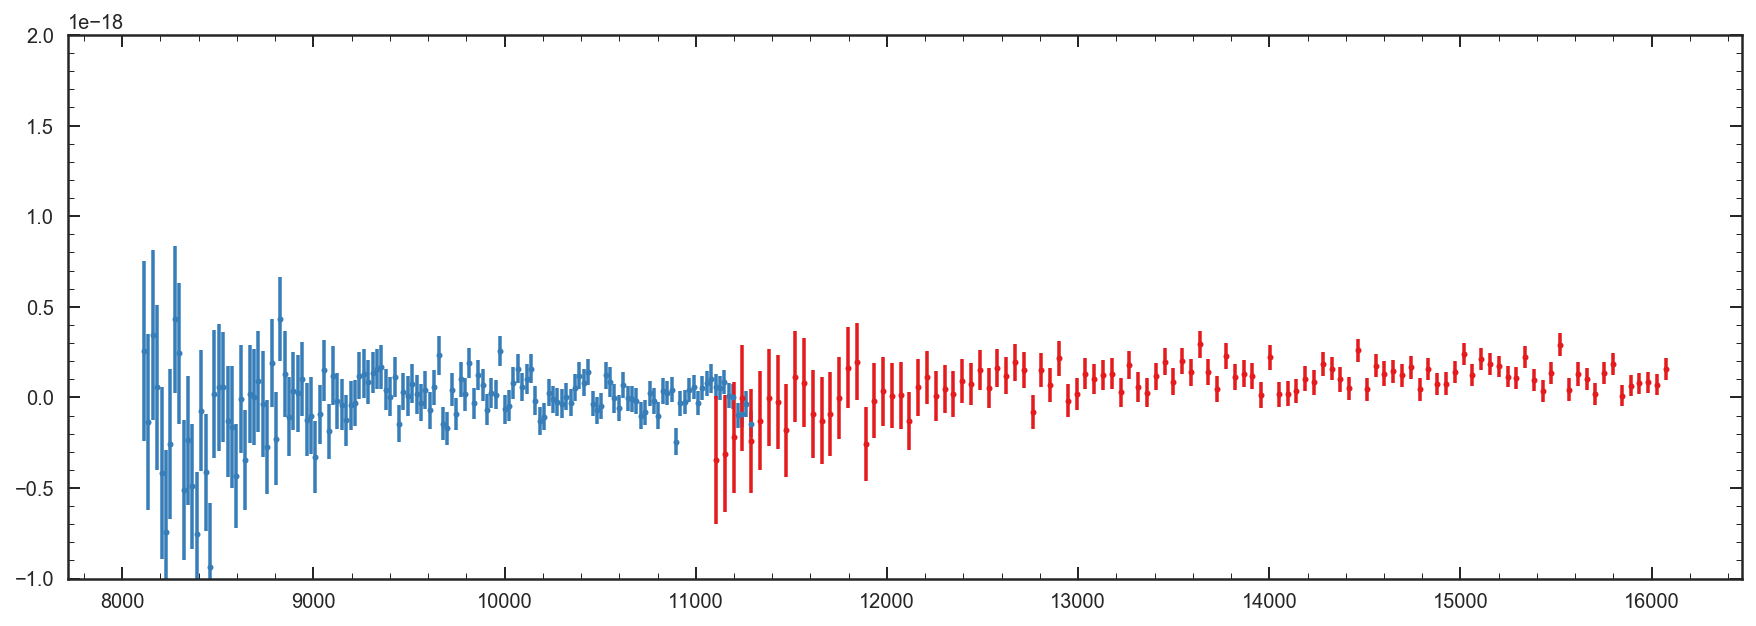

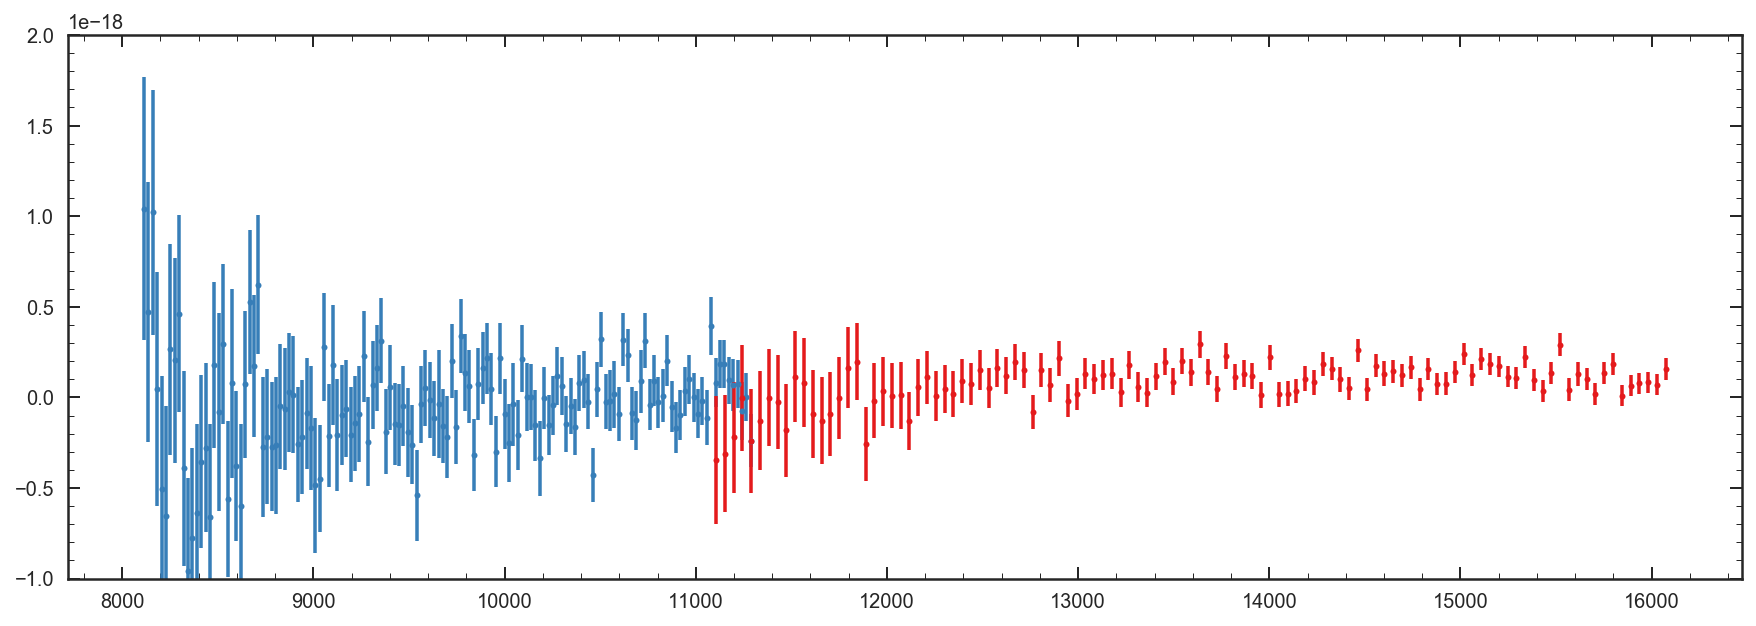

In [33]:
Bwv, Bflx, Berr, Bflt = np.load('../spec_files/GND_35175_g102.npy')
Rwv, Rflx, Rerr, Rflt = np.load('../spec_files/GND_35175_g141.npy')

IDB = [U for U in range(len(Bwv)) if 8100 < Bwv[U] < 11300]
IDR = [U for U in range(len(Rwv)) if 11100 < Rwv[U] < 16100]

plt.figure(figsize=[15,5])
plt.errorbar(Bwv[IDB],Bflx[IDB],Berr[IDB],
            linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(Rwv[IDR],Rflx[IDR],Rerr[IDR],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.ylim(-1E-18,2E-18)
Bwv2, Bflx2, Berr2, Bflt2 = np.load('../spec_files/GND_35175_2_g102.npy')
Rwv2, Rflx2, Rerr2, Rflt2 = np.load('../spec_files/GND_35175_2_g141.npy')

IDB2 = [U for U in range(len(Bwv2)) if 8100 < Bwv2[U] < 11300]
IDR2 = [U for U in range(len(Rwv2)) if 11100 < Rwv2[U] < 16100]

plt.figure(figsize=[15,5])
plt.errorbar(Bwv2[IDB2],Bflx2[IDB2],Berr2[IDB2],
            linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(Rwv2[IDR2],Rflx2[IDR2],Rerr2[IDR2],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.ylim(-1E-18,2E-18)

In [34]:
Bstk,Bster = Stack(Bwv[Bflx2**2>0], [Bflx[Bflx2**2>0],Bflx2[Bflx2**2>0]],[Berr[Bflx2**2>0], Berr2[Bflx2**2>0] ])
Rstk,Rster = Stack(Rwv[Rflx2**2>0], [Rflx[Rflx2**2>0],Rflx2[Rflx2**2>0]],[Rerr[Rflx2**2>0], Rerr2[Rflx2**2>0] ])

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [28]:
def Stack(wv,flgrid,errgrid):

    flgrid = np.transpose(flgrid)
    errgrid = np.transpose(errgrid)
    weigrid = errgrid ** (-2)
    infmask = np.isinf(weigrid)
    weigrid[infmask] = 0
    ################

    stack, err = np.zeros([2, len(wv)])
    for i in range(len(wv)):
        stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
        err[i] = 1 / np.sqrt(np.sum(weigrid[i]))
    
    return stack, err

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


(-1e-18, 2e-18)

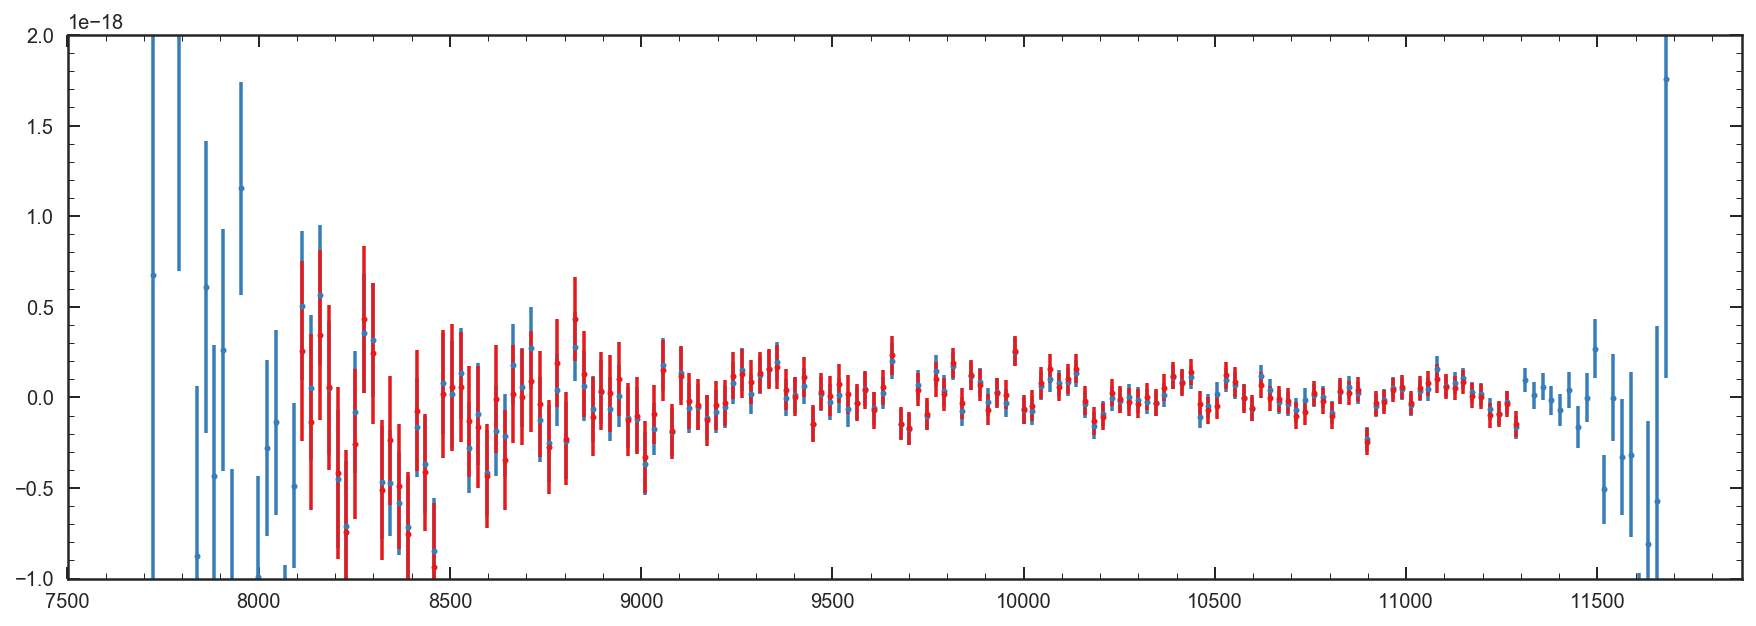

In [35]:
plt.figure(figsize=[15,5])
plt.errorbar(Bwv[Bflx2**2>0],Bstk,Bster,
            linestyle='None', marker='o', markersize=3, color='#377eb8')

plt.errorbar(Bwv[IDB],Bflx[IDB],Berr[IDB],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.ylim(-1E-18,2E-18)

(-1e-18, 1.5e-18)

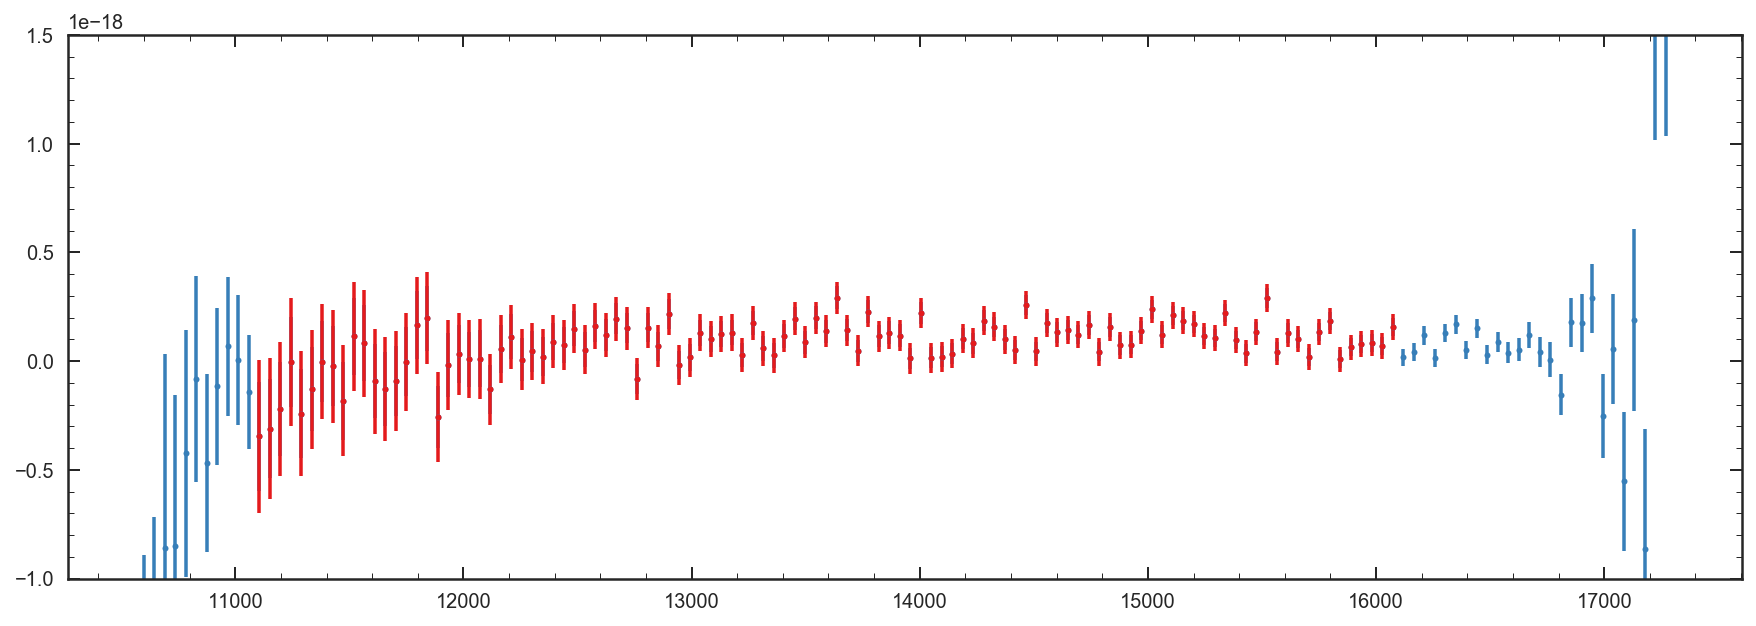

In [36]:
plt.figure(figsize=[15,5])
plt.errorbar(Rwv[Rflx2**2>0],Rstk,Rster,
            linestyle='None', marker='o', markersize=3, color='#377eb8')

plt.errorbar(Rwv[IDR],Rflx[IDR],Rerr[IDR],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.ylim(-1E-18,1.5E-18)

In [37]:
np.save('../spec_files/GND_35175_g102', [Bwv[Bflx2**2>0],Bstk,Bster, Bflt[Bflx2**2>0]])
np.save('../spec_files/GND_35175_g141', [Rwv[Rflx2**2>0],Rstk,Rster, Rflt[Rflx2**2>0]])

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


# rescale 

rescale ../spec_files/GND_18333
rescale ../spec_files/GND_21516
rescale ../spec_files/GND_35175
rescale ../spec_files/GSD_40623
rescale ../spec_files/GSD_41148

In [3]:
gnd_cat

,phot_id_x,grism_id_x,jh_mag_x,z_spec_x,z_peak_phot,z_phot_l95,z_phot_l68,z_phot_u68,z_phot_u95,z_max_grism_x,...,n_271,L272,n_272,L273,n_273,L274,n_274,L275,n_275,UVJ
1168,14140,b'GN7-G102_14140',21.853,-1.0,1.6775,1.587,1.628,1.726,1.767,1.8349,...,12.0,0.404704,12.0,0.865218,13.0,0.982766,14.0,22.35410,5.0,Q
1120,15976,b'GN7-G102_15976',23.452,-1.0,2.3387,2.084,2.252,2.432,2.496,2.1283,...,12.0,0.437132,14.0,0.673639,15.0,0.719555,15.0,8.53498,6.0,Q
1869,21427,b'GN4-G102_21427',21.857,-1.0,1.4738,1.395,1.430,1.517,1.552,1.5018,...,10.0,0.308952,12.0,0.702919,12.0,0.813474,12.0,18.97240,7.0,Q
1818,21738,b'GN2-G102_21738',22.756,-1.0,2.0362,1.885,1.958,2.108,2.157,2.1158,...,12.0,0.159133,14.0,0.438265,15.0,0.515992,14.0,16.10000,6.0,Q
646,23018,b'GN4-G102_23018',22.460,-1.0,2.0393,1.925,1.967,2.120,2.219,2.2740,...,12.0,1.039650,14.0,1.449090,15.0,1.522850,14.0,18.21190,6.0,Q
472,33780,b'GN5-G102_33780',21.753,-1.0,1.8039,1.679,1.733,1.872,1.931,1.8648,...,12.0,0.280683,12.0,0.706714,14.0,0.811919,14.0,29.71660,6.0,Q
1301,35469,b'GN3-G102_35469',22.731,-1.0,1.7846,1.675,1.727,1.856,1.926,1.9639,...,12.0,0.341194,12.0,0.633854,14.0,0.700478,14.0,10.69610,6.0,Q
2121,36672,b'GN5-G102_36672',24.549,-1.0,3.1710,2.985,3.076,3.270,3.366,3.6297,...,15.0,1.374330,17.0,1.491540,14.0,1.489590,13.0,13.24740,2.0,Q
1224,37896,b'GN1-G102_37896',23.670,-1.0,1.5763,1.358,1.450,1.712,1.805,1.8221,...,12.0,0.069792,12.0,0.145160,12.0,0.164348,12.0,3.89885,5.0,Q
1894,37901,b'GN1-G102_37901',24.738,-1.0,4.3062,4.076,4.195,4.415,4.478,3.8842,...,17.0,1.751140,17.0,1.878900,14.0,1.876790,13.0,10.46420,2.0,Q


<ErrorbarContainer object of 3 artists>

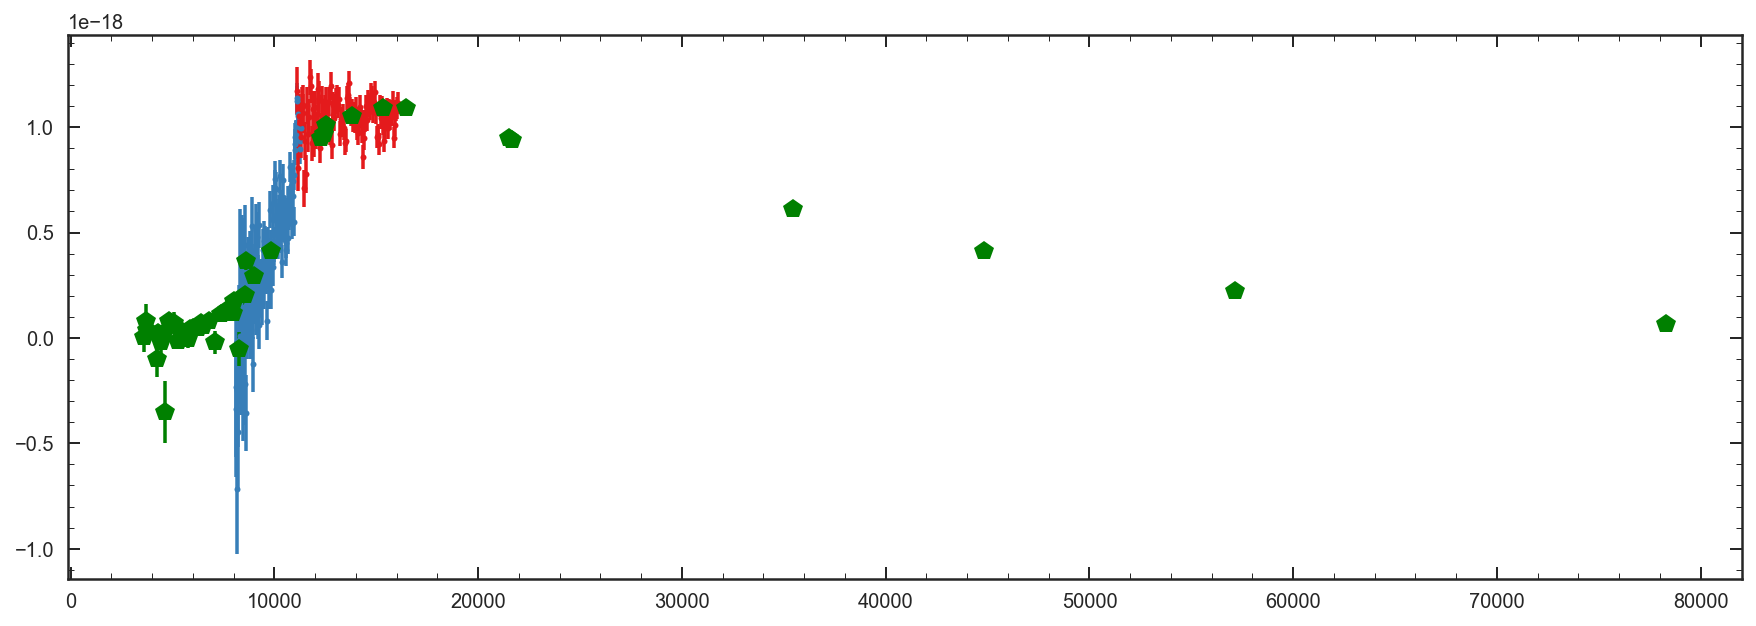

In [254]:
Bwv, Bflx, Berr, Bflt = np.load('../spec_files/GSD_41148_g102.npy')
Rwv, Rflx, Rerr, Rflt = np.load('../spec_files/GSD_41148_g141.npy')
Pwv, Pflx, Perr, Pnum = np.load('../phot/GSD_41148_phot.npy')

IDB = [U for U in range(len(Bwv)) if 8100 < Bwv[U] < 11300]
IDR = [U for U in range(len(Rwv)) if 11100 < Rwv[U] < 16100]

plt.figure(figsize=[15,5])
plt.errorbar(Bwv[IDB],Bflx[IDB],Berr[IDB],
            linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(Rwv[IDR],Rflx[IDR],Rerr[IDR],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(Pwv, Pflx, Perr,
            linestyle='None', marker='p', markersize=10, color='G')
# plt.xlim(5000,20000)

In [2]:
ls /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/*/*/*GrismFLT.fits

/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/ibhj01iqq.01.GrismFLT.fits
/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/ibhj01ixq.01.GrismFLT.fits
/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/ibhj01j4q.01.GrismFLT.fits
/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/ibhj01jbq.01.GrismFLT.fits
/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt07dxq.01.GrismFLT.fits
/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt07dzq.01.GrismFLT.fits
/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt07e2q.01.GrismFLT.fits
/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt07e4q.01.GrismFLT.fits
/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt08e7q.01.GrismFLT.fits
/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt08e9q.01.GrismFLT.fits
/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt08ecq.01.GrismFLT.fits
/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt08e

In [3]:
field = 'GS1'
grp = multifit.GroupFLT(grism_files = glob('/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/*/*/*GrismFLT.fits'))

Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/ibhj01ixq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/ibhj01iqq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/ibhj01j4q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/ibhj01jbq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt07dxq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt07dzq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt07e2q.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt07e4q.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt08e7q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt08e9q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt08ecq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt08eeq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt09f0q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt09f2q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt09f5q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt09f7q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt10dbq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt10deq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS1/j033300m2742/Prep/icxt10diq.01.GrismFLT.fits!

In [3]:
ex = Extract_all(41086, 'GSD', grp)

In [4]:
ex.Phot_save()
ex.Extract_spec()
ex.Extract_BeamCutout()

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1200: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:2948: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  out = np.linalg.lstsq(A.T,y)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/Vince.ec/GitHub/C

In [17]:
beams = grp.get_beams(1)
if len(beams) > 0:
    pa = -1
    for i in beams:
        if i.grism.filter == 'G102':
            if pa != i.get_dispersion_PA():
                pa = i.get_dispersion_PA()
                print(i.grism.filter)
                print(pa)
    #             i.write_fits(root='../beams/o{0}'.format(pa), clobber=True)
    #             fits.setval('../beams/o{0}_{1}.{2}.A.fits'.format(pa, self.galaxy_id, i.grism.filter), 'EXPTIME', ext=0,
    #                     value=fits.open('../beams/o{0}_{1}.{2}.A.fits'.format(pa, self.galaxy_id, i.grism.filter))[1].header['EXPTIME'])   
                break
    pa = -1            
    for i in beams:
        if i.grism.filter == 'G141':
            if pa != i.get_dispersion_PA():
                pa = i.get_dispersion_PA()
                print(i.grism.filter)
                print(pa)
    #             i.write_fits(root='../beams/o{0}'.format(pa), clobber=True)
    #             fits.setval('../beams/o{0}_{1}.{2}.A.fits'.format(pa, self.galaxy_id, i.grism.filter), 'EXPTIME', ext=0,
    #                     value=fits.open('../beams/o{0}_{1}.{2}.A.fits'.format(pa, self.galaxy_id, i.grism.filter))[1].header['EXPTIME'])  
                break
else:
    print('missing')

missing


In [6]:
mb = multifit.MultiBeam(ex.beams,fcontam=1.0)

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.s

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: divide by zero encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2580: RuntimeWarning: invalid value encountered in greater
  clip &= (er > 0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:598: RuntimeWarning: invalid value encountered in true_divide
  opt_flux = num.sum(axis=0)/den.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib

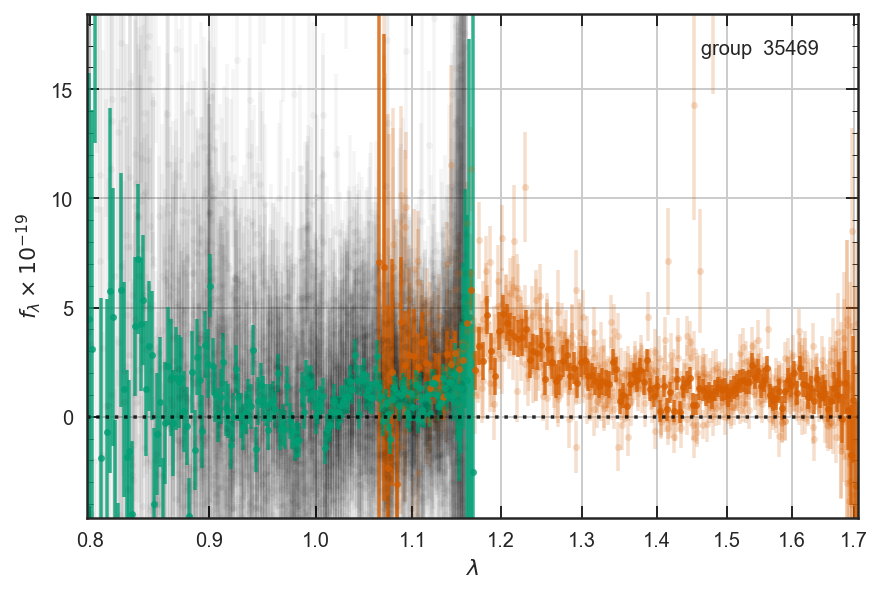

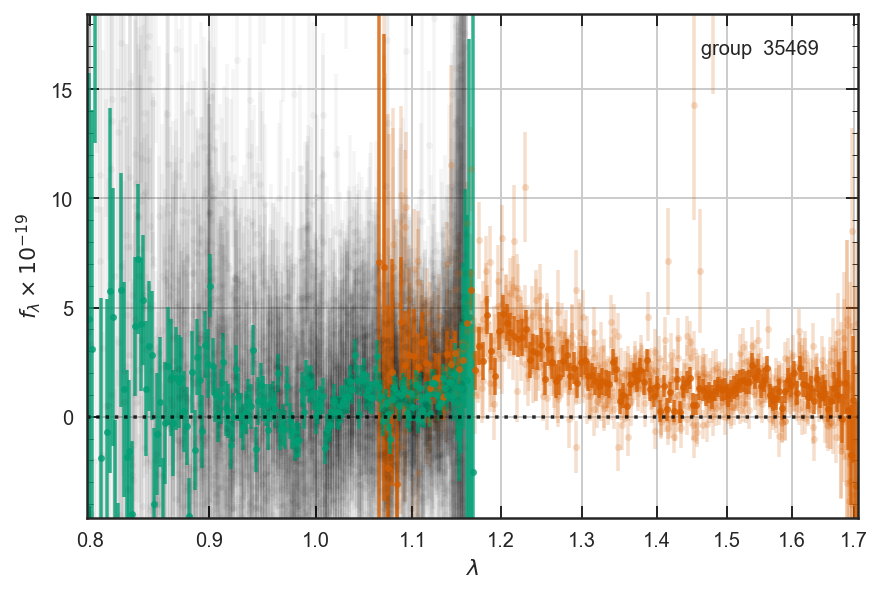

In [7]:
mb.oned_figure()

# look at new photometry

In [3]:
n_cat4 = Table.read('/Users/vestrada/3dhst_v4.4/goodsn_3dhst.v4.4.cats/Catalog/goodsn_3dhst.v4.4.cat', format = 'ascii').to_pandas()
s_cat4 = Table.read('/Users/vestrada/3dhst_v4.4/goodss_3dhst.v4.4.cats/Catalog/goodss_3dhst.v4.4.cat', format = 'ascii').to_pandas()

In [10]:
def Phot_get(ref_cat_loc, galaxy_id, pre, masterlist = '../phot/master_template_list.pkl'):
    galdf = ref_cat_loc[ref_cat_loc.id == galaxy_id]
    master_tmp_df = pd.read_pickle(masterlist)

    eff_wv = []
    phot_fl = []
    phot_er = []
    phot_num = []

    for i in galdf.keys():
        if i[0:2] == 'f_':
            Clam = 3E18 / master_tmp_df.eff_wv[master_tmp_df.tmp_name == pre + i].values[0] **2 * 10**((-1.1)/2.5-29)
            if galdf[i].values[0] > -99.0:
                eff_wv.append(master_tmp_df.eff_wv[master_tmp_df.tmp_name == pre + i].values[0])
                phot_fl.append(galdf[i].values[0]*Clam)
                phot_num.append(master_tmp_df.tmp_num[master_tmp_df.tmp_name == pre + i].values[0])
        if i[0:2] == 'e_':
            if galdf[i].values[0] > -99.0:
                phot_er.append(galdf[i].values[0]*Clam)

    return eff_wv,phot_fl,phot_er,phot_num

In [82]:
Pwv,Pfl,Per,Pnm= Phot_get(s_cat4, 41520, 'S_')
OPwv, OPfl, OPer, OPnm = np.load('../phot/GSD_41520_phot.npy')

<ErrorbarContainer object of 3 artists>

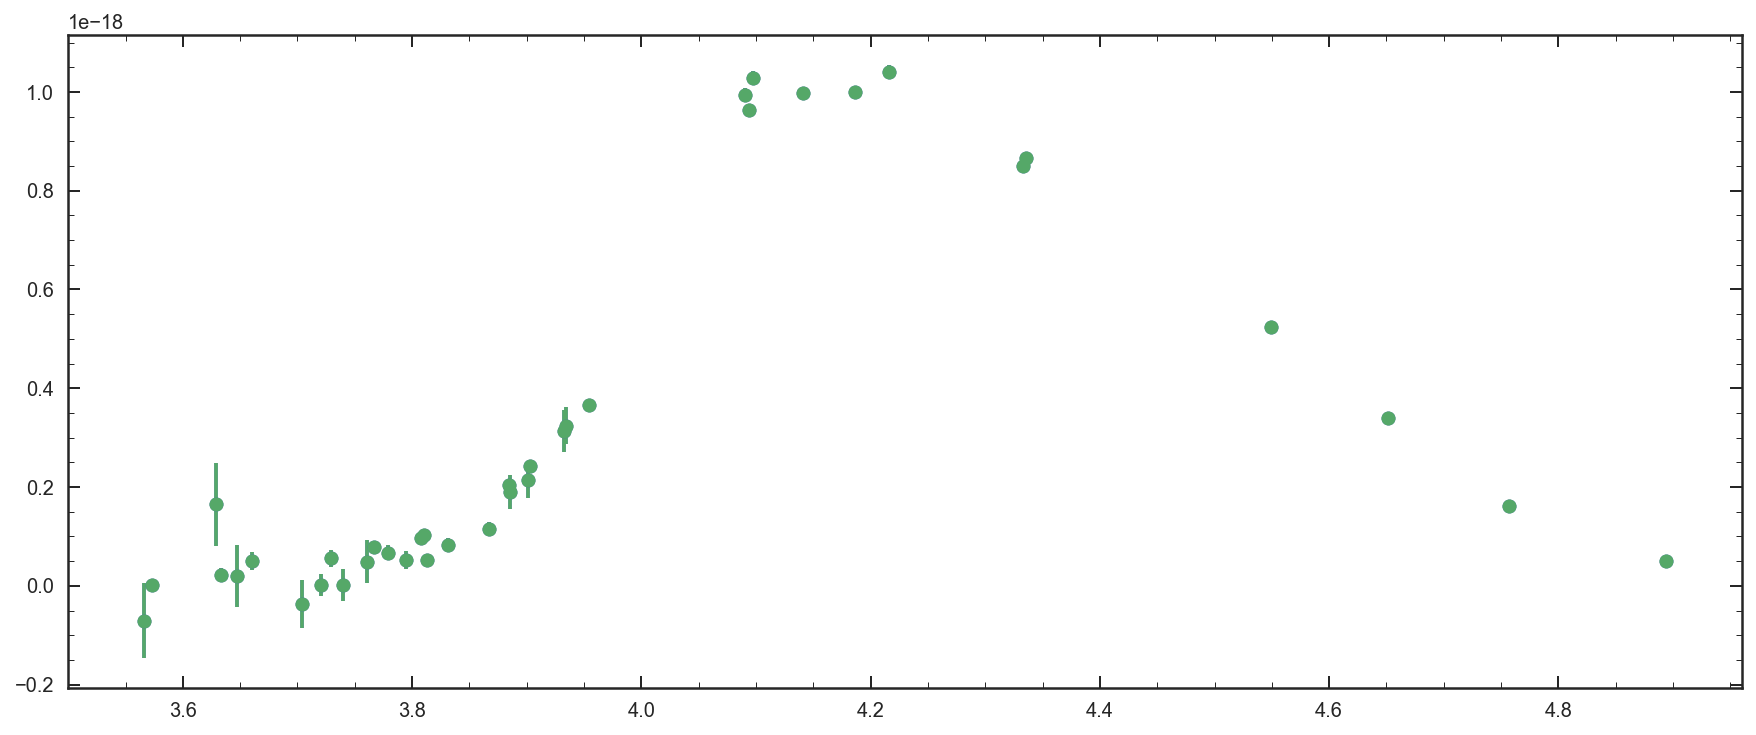

In [83]:
plt.figure(figsize=[15,6])
plt.errorbar(np.log10(Pwv),Pfl,Per,fmt='o')
plt.errorbar(np.log10(OPwv),OPfl,OPer,fmt='o')

In [33]:
from spec_tools import Photometry

In [24]:
Pfl - OPfl

array([ 0.00000000e+00, -2.02065304e-20, -1.57767050e-20,  1.24269491e-21,
       -1.04279205e-20, -9.39140407e-21, -9.51678682e-21, -8.79274663e-21,
       -2.74407085e-21, -2.92922602e-20, -2.70996249e-20, -5.15538348e-20,
       -4.60036058e-20,  2.00431512e-19,  9.73881334e-20, -2.09678264e-19,
       -7.07221618e-20, -5.55234562e-19, -1.16322241e-18, -6.62367489e-19,
       -4.82588897e-19, -1.79035140e-19,  2.73584494e-18])

In [26]:
master = pd.read_pickle('../phot/master_template_list.pkl')

In [32]:
master.tmp_num[68] = 118

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
wave, flux = np.load('../data/sim_spec.npy')

In [35]:
PHOT = Photometry(wave,flux, np.ones(len(flux)),46)

In [52]:
PHOT.Get_Sensitivity(filter_num=117)
PHOT.Photo()

In [53]:
PHOT.eff_wv

7646.000955191475

In [54]:
master.eff_wv[67] =7646.000955191475

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
master.to_pickle('../phot/master_template_list.pkl')

In [69]:
pn = glob('../phot/GND*')
ps = glob('../phot/GSD*')

In [73]:
pnid = [os.path.basename(U).split('_')[1] for U in pn]
psid = [os.path.basename(U).split('_')[1] for U in ps]

In [77]:
for i in range(len(pn)):
    Pwv,Pfl,Per,Pnm= Phot_get(n_cat4, int(pnid[i]), 'N_')
    np.save('../phot/GND_{0}_phot'.format(pnid[i]),[Pwv,Pfl,Per,Pnm])
    
for i in range(len(ps)):
    Pwv,Pfl,Per,Pnm= Phot_get(s_cat4, int(psid[i]), 'S_')
    np.save('../phot/GSD_{0}_phot'.format(psid[i]),[Pwv,Pfl,Per,Pnm])